# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car reconizing the car in front.

## Get the data

The images we are working with are frrom the Food101 dataset (101 different classes of food).

However we have modified it to only use two classes (pizza and steak).

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
'''
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()
'''

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!dir pizza_steak

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: E804-15D3

 Directorio de c:\Users\Usuario\Documents\ML_Projects\TensorFlow\Computer_Vision\pizza_steak

07/06/2025  13:44    <DIR>          .
07/06/2025  20:04    <DIR>          ..
07/06/2025  13:44    <DIR>          test
07/06/2025  13:44    <DIR>          train
               0 archivos              0 bytes
               4 dirs  797.993.222.144 bytes libres


In [4]:
!dir pizza_steak\train\

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: E804-15D3

 Directorio de c:\Users\Usuario\Documents\ML_Projects\TensorFlow\Computer_Vision\pizza_steak\train

07/06/2025  13:44    <DIR>          .
07/06/2025  13:44    <DIR>          ..
07/06/2025  13:44    <DIR>          pizza
07/06/2025  13:44    <DIR>          steak
               0 archivos              0 bytes
               4 dirs  797.993.259.008 bytes libres


In [5]:
!dir pizza_steak\train\pizza

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: E804-15D3

 Directorio de c:\Users\Usuario\Documents\ML_Projects\TensorFlow\Computer_Vision\pizza_steak\train\pizza

07/06/2025  13:44    <DIR>          .
07/06/2025  13:44    <DIR>          ..
07/06/2025  13:44            45.555 1008104.jpg
07/06/2025  13:44            55.042 1008144.jpg
07/06/2025  13:44            48.090 1008844.jpg
07/06/2025  13:44            44.492 1008941.jpg
07/06/2025  13:44           118.923 1011404.jpg
07/06/2025  13:44            52.687 102037.jpg
07/06/2025  13:44            47.401 1026922.jpg
07/06/2025  13:44            76.126 1029698.jpg
07/06/2025  13:44            57.669 1033251.jpg
07/06/2025  13:44            64.285 1035854.jpg
07/06/2025  13:44            35.744 1038357.jpg
07/06/2025  13:44            51.637 1040878.jpg
07/06/2025  13:44            48.281 1044524.jpg
07/06/2025  13:44            64.412 1044789.jpg
07/06/2025  13:44            41.408 1047561.jpg
07/06

In [6]:
import os

# Walk trhough pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\test\pizza.
There are 0 directories and 250 images in pizza_steak\test\steak.
There are 2 directories and 0 images in pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\train\steak.


In [9]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [11]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')

# Create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}') # show the shape of the image

    return img

['1512347.jpg']
Image shape: (512, 512, 3)


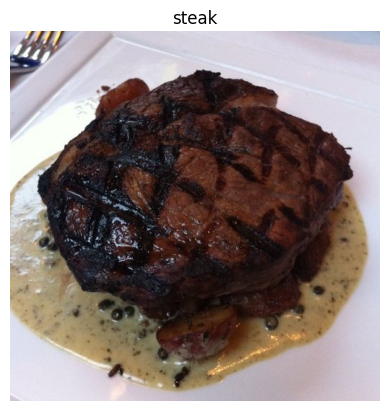

In [18]:
# View a random image from the training datset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

['259449.jpg']
Image shape: (382, 512, 3)


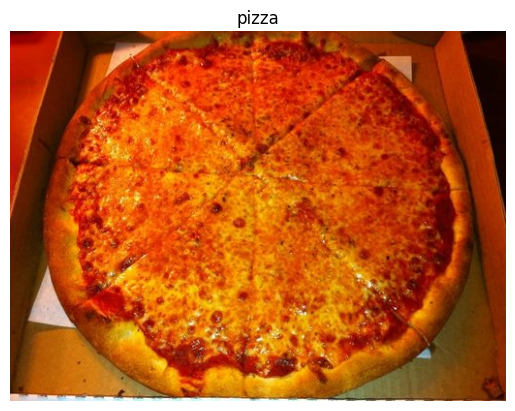

In [34]:
# View a random image from the training datset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
# The images we have imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 70,   0,   0],
        [ 70,   0,   0],
        [ 70,   0,   0],
        ...,
        [ 16,   2,   0],
        [ 16,   2,   0],
        [ 16,   2,   0]],

       [[ 79,   1,   1],
        [ 78,   3,   0],
        [ 80,   2,   2],
        ...,
        [ 17,   3,   0],
        [ 17,   3,   0],
        [ 17,   3,   0]],

       [[ 94,   3,   2],
        [ 93,   4,   0],
        [ 94,   3,   2],
        ...,
        [ 18,   3,   0],
        [ 19,   4,   1],
        [ 19,   4,   1]],

       ...,

       [[230, 188, 164],
        [230, 188, 164],
        [233, 188, 167],
        ...,
        [ 73,  20,   6],
        [ 93,  34,  18],
        [100,  37,  20]],

       [[226, 188, 167],
        [225, 187, 166],
        [228, 187, 169],
        ...,
        [ 77,  20,   0],
        [ 95,  30,   8],
        [ 97,  29,   6]],

       [[223, 186, 167],
        [224, 187, 168],
        [227, 188, 171],
        ...,
        [112,  54,  3